<a id='content'></a>
<img src='photos/douyin_live_icon_Lisa.png' width="280"/>
<img src='photos/LiuGengHong.png' width="280"/>
## 🎅 Content 
* [General Analysis](#general_analysis)  
* [Machine Learning](#machine_learning)
    * [regression](#regression)
        * [linear regression](#linear_regression)
        * [decision tree and random forest](#decision_tree_and_random_forest)
    * [classification](#classification)
        * [K Nearest Neighbours](#knn)
        * [decision tree and random forest](#decision_tree_and_random_forest2)

#### some imports

In [1]:
import pandas as pd
import numpy as np
import apyori
from apyori import apriori
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

4.14.3


In [3]:
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)

In [4]:
# For offline use
cf.go_offline()

load raw data and data preprocess.

In [5]:
df_src = pd.read_excel('src_data_0421.xlsx')
# df_src.head()

In [6]:
df_src.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   source_name    19021 non-null  object        
 1   id             18962 non-null  object        
 2   name           17713 non-null  object        
 3   live_adr       19021 non-null  object        
 4   live_title     19021 non-null  object        
 5   live_cat1      19021 non-null  object        
 6   live_cat2      18882 non-null  object        
 7   live_pop       18446 non-null  float64       
 8   per_adr        19015 non-null  object        
 9   per_follow     18954 non-null  float64       
 10  per_fans       18962 non-null  object        
 11  per_like       18962 non-null  object        
 12  per_video_num  18961 non-null  float64       
 13  per_intro      19015 non-null  object        
 14  date           11671 non-null  datetime64[ns]
 15  time_h         1891

In [7]:
# pre_like & per_fans 'w' & '亿' unit issue.
df_src['per_like'] = df_src['per_like'].apply(
    lambda x: float(x.split('w')[0]) * 1e4 if str(x).__contains__('w') 
    else float(x.split('亿')[0]) * 1e8 if str(x).__contains__('亿')  else float(x))
df_src['per_fans'] = df_src['per_fans'].apply(
    lambda x: float(x.split('w')[0]) * 1e4 if str(x).__contains__('w') 
    else float(x.split('亿')[0]) * 1e8 if str(x).__contains__('亿')  else float(x))
df_src.head()

,source_name,id,name,live_adr,live_title,live_cat1,live_cat2,live_pop,per_adr,per_follow,per_fans,per_like,per_video_num,per_intro,date,time_h
0,rlt_主机单机_00_06_04_2022,2102823322,白老师的正经解说,https://live.douyin.com/122968300347,白老师的正经解说的抖音直播间,主机单机,拳皇系列,6140.0,https://www.douyin.com/user/MS4wLjABAAAA7NNqJ5...,8231.0,452000.0,235000.0,83.0,[],2022-06-04,0.0
1,rlt_主机单机_00_06_04_2022,Gzdojo_Weili,威力电竞格斗游戏解说,https://live.douyin.com/76490985813,威力电竞格斗游戏解说的抖音直播间,主机单机,拳皇系列,4839.0,https://www.douyin.com/user/MS4wLjABAAAAiCwpDj...,837.0,295000.0,496000.0,567.0,"['广州【格斗家】电竞俱乐部【街霸5】选手', '【拳皇】【街霸】专业解说，游戏赛事运营。'...",2022-06-04,0.0
2,rlt_主机单机_00_06_04_2022,QianNiao530,千鸟,https://live.douyin.com/838081084490,千鸟的抖音直播间,主机单机,战地5,4208.0,https://www.douyin.com/user/MS4wLjABAAAAaszFN5...,1226.0,193000.0,3443000.0,648.0,['近期有挂哥冒充我名义开服务器，望大家注意！'],2022-06-04,0.0
3,rlt_主机单机_00_06_04_2022,QQMuaa,秋秋马🦄,https://live.douyin.com/923670558441,秋秋马🦄的抖音直播间,主机单机,其他主机游戏,3781.0,https://www.douyin.com/user/MS4wLjABAAAAbASBb8...,110.0,2315000.0,21493000.0,344.0,"['-微博同名同头像：秋秋马（🉑日常私信）', '-游戏开黑q👗：864113604（一群）...",2022-06-04,0.0
4,rlt_主机单机_00_06_04_2022,1435898915,勇士的荣耀,https://live.douyin.com/667919040089,勇士的荣耀的抖音直播间,主机单机,其他格斗,2883.0,https://www.douyin.com/user/MS4wLjABAAAAHUyjpT...,89.0,2831000.0,37270000.0,1781.0,['绽放中国力量的格斗殿堂'],2022-06-04,0.0


<a id='general_analysis'></a>
## [General Analysis](#content)

<AxesSubplot:>

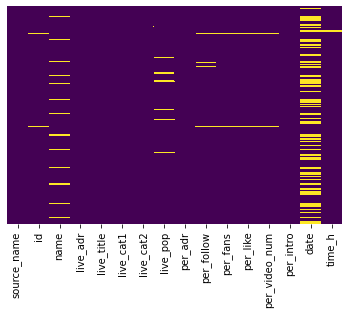

In [8]:
sns.heatmap(df_src.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
# df_src['source_name'].unique()
# df_src['date'].apply(lambda x: str(x.year) + '-' + str(x.month) + '-' + str(x.day)).unique()
df_src['time_h'].unique()

array([ 0.,  2.,  1.,  9., 10., 11., 14., 15., 16., 18., nan, 21., 22.,
       23.,  3., 19., 12., 17., 13.])

In [21]:
# fill NA values in date and time_h
df_src['date'] = df_src['source_name'].apply(
    lambda x: x.split('_')[-1] + '-' + x.split('_')[-2] + '-' + x.split('_')[-3])

df_src['time_h'] = df_src[['source_name', 'time_h']].apply(lambda x: int(x[0].split('_')[2]) if pd.isna(x[1]) else int(x[1]), axis=1)

df_src.to_excel('df_src_tableau.xlsx', index=False)

#### live_pop by category

In [34]:
import plotly.express as px
# df = px.data.tips()
fig = px.box(df_src, x="live_cat1", y="live_pop", labels={'live_cat1': '直播分类', 'live_pop': '直播间人气'})
fig.show()

In [35]:
import plotly.express as px
# df = px.data.tips()
fig = px.box(df_src[df_src['live_cat1'] == '娱乐天地'], x="live_cat2", y="live_pop", labels={'live_cat2': '娱乐天地', 'live_pop': '直播间人气'})
fig.show()

<a id='machine_learning'></a>
## [Machine Learning](#content)

<a id='regression'></a>
### [regression](#content)
This all started in the 1800s with a guy named <span style="color:blue">Francis Galton</span>. Galton was studying the relationship between parents and their children. In particular, he investigated the relationship between the heights of fathers and their sons.  
  
What he discovered was that a man's son tended to be roughly as tall as his father.  
  
However Galton's breakthrough was that the son's height **tended to be closer to the overage height of all people**.

<a id='linear_regression'></a>
#### [linear regression](#content)

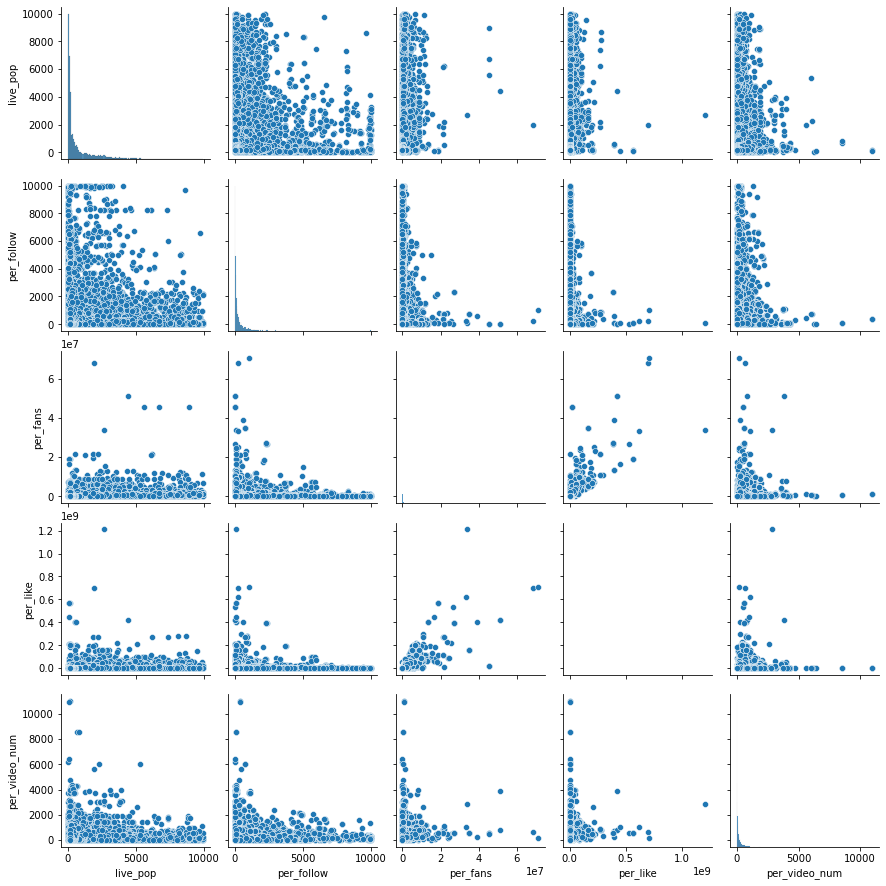

In [72]:
sns.pairplot(df_src[['live_pop', 'per_follow', 'per_fans', 'per_like', 'per_video_num']])

<AxesSubplot:>

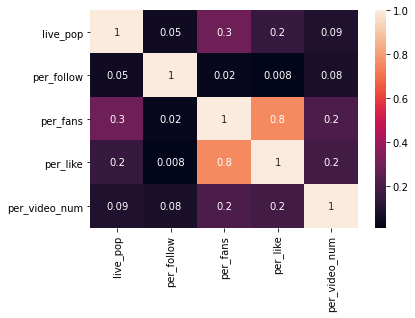

In [73]:
sns.heatmap(df_src[['live_pop', 'per_follow', 'per_fans', 'per_like', 'per_video_num']].corr(), fmt='0.1g', annot=True)

<AxesSubplot:>

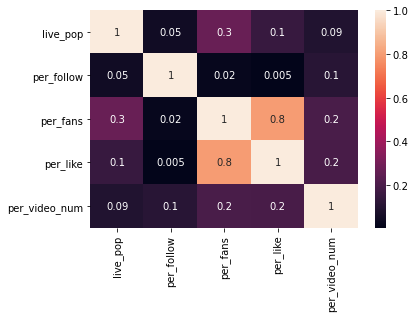

In [89]:
df_src_g = df_src[['id', 'live_pop', 'per_follow', 'per_fans', 'per_like', 'per_video_num']].groupby('id').mean().reset_index()
sns.heatmap(df_src_g.corr(), fmt='0.1g', annot=True)

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [9]:
df_src_copy = df_src.dropna().copy()
X = df_src_copy[['per_follow', 'per_fans', 'per_like', 'per_video_num']]
y = df_src_copy['live_pop']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train our model on the training set and then use the test set to evaluate the model.

In [10]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the Model

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
lm = LinearRegression()

In [79]:
lm.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [80]:
# print the intercept
print(lm.intercept_)

794.8109330342612


In [81]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
per_follow,0.058300
per_fans,0.000370
per_like,-0.000008
per_video_num,0.205743


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Per_follow** is associated with an **increase of 0.063726 Live_pop **.
- Holding all other features fixed, a 1 unit increase in **Per_fans** is associated with an **increase of 0.000379 Live_pop **.
- Holding all other features fixed, a 1 unit increase in **Per_like** is associated with an **increase of -0.000007 Live_pop **.
- Holding all other features fixed, a 1 unit increase in **Per_video_num** is associated with an **increase of 0.205743 Live_pop **.

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [82]:
predictions = lm.predict(X_test)

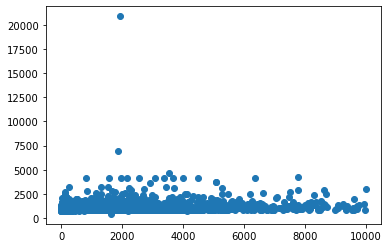

In [83]:
plt.scatter(y_test,predictions)

**Residual Histogram**

C:\Users\U1082524\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



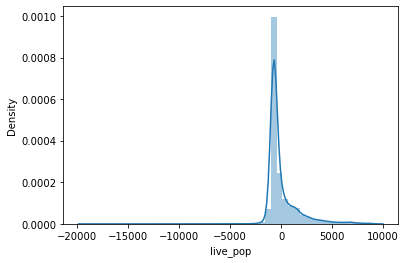

In [84]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [85]:
from sklearn import metrics

In [86]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1011.8066212867964
MSE: 2383709.4257733733
RMSE: 1543.926625773833


In [11]:
df_src['live_pop'].mean()

958.216632332213

<a id='decision_tree_and_random_forest'></a>
#### [decision tree and random forest](#content)

## Train Test Split

Let's split up the data into a training set and a test set!

In [90]:
# columnslist-like, default None
# Column names in the DataFrame to be encoded. If columns is None then all the columns with object or category dtype will be converted.
df_src_tree = pd.get_dummies(df_src[['live_cat1', 'per_follow', 'per_fans', 'per_like', 'per_video_num', 'live_pop']], drop_first=True)
df_src_tree.fillna(0, inplace=True)
df_src_tree.head()

,per_follow,per_fans,per_like,per_video_num,live_pop,live_cat1_娱乐天地,live_cat1_射击游戏,live_cat1_手机游戏,live_cat1_棋牌游戏,live_cat1_科技文化,live_cat1_网游竞技
0,8231.0,452000.0,235000.0,83.0,6140.0,0,0,0,0,0,0
1,837.0,295000.0,496000.0,567.0,4839.0,0,0,0,0,0,0
2,1226.0,193000.0,3443000.0,648.0,4208.0,0,0,0,0,0,0
3,110.0,2315000.0,21493000.0,344.0,3781.0,0,0,0,0,0,0
4,89.0,2831000.0,37270000.0,1781.0,2883.0,0,0,0,0,0,0


In [91]:
X_t = df_src_tree.drop(columns='live_pop')
y_t = df_src_tree['live_pop']
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t, test_size=0.4, random_state=101)

## Decision Trees

We'll start just by training a single decision tree.

In [92]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [93]:
decision_model = DecisionTreeRegressor()  
decision_model.fit(X_train_t, y_train_t) 

DecisionTreeRegressor()

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [94]:
predicted_decision_trees = decision_model.predict(X_test_t)
print ("Mean Absolute Error using Decision Tress :", mean_absolute_error(y_test_t, predicted_decision_trees))

Mean Absolute Error using Decision Tress : 683.742271057457


In [95]:
pd.concat([X_test_t.reset_index(drop=True), y_test_t.reset_index(drop=True), pd.Series(predicted_decision_trees, name='predicted_value')], axis=1).sort_values(by='predicted_value', ascending=False)

,per_follow,per_fans,per_like,per_video_num,live_cat1_娱乐天地,live_cat1_射击游戏,live_cat1_手机游戏,live_cat1_棋牌游戏,live_cat1_科技文化,live_cat1_网游竞技,live_pop,predicted_value
40,2212.0,1447000.0,4767000.0,257.0,1,0,0,0,0,0,9934.0,9934.0
452,2200.0,842000.0,3860000.0,95.0,1,0,0,0,0,0,6442.0,9934.0
6981,98.0,1169000.0,4794000.0,556.0,0,0,1,0,0,0,0.0,9896.0
7191,93.0,1168000.0,4791000.0,556.0,0,0,1,0,0,0,6133.0,9896.0
7487,78.0,1167000.0,4773000.0,551.0,0,0,1,0,0,0,7168.0,9896.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2522,109.0,1913000.0,35375000.0,3961.0,1,0,0,0,0,0,3901.0,0.0
684,34.0,468000.0,73000.0,15.0,1,0,0,0,0,0,0.0,0.0
5530,0.0,7128000.0,36797000.0,1410.0,1,0,0,0,0,0,0.0,0.0
995,68.0,716000.0,1005000.0,44.0,1,0,0,0,0,0,7768.0,0.0


In [96]:
pd.concat([X_test_t.reset_index(drop=True), y_test_t.reset_index(drop=True), pd.Series(predicted_decision_trees, name='predicted_value')], axis=1).sort_values(by='predicted_value', ascending=False).to_excel('temp.xlsx')

## Random Forests

Now let's compare the decision tree model to a random forest.

In [97]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=100, max_depth=100)
rfc.fit(X_train_t, y_train_t)

RandomForestRegressor(max_depth=100)

In [98]:
rfc_pred = rfc.predict(X_test_t)
print ("Mean Absolute Error using Decision Tress :", mean_absolute_error(y_test_t, rfc_pred))

Mean Absolute Error using Decision Tress : 557.5071155617882


In [99]:
pd.concat([X_test_t.reset_index(drop=True), y_test_t.reset_index(drop=True), pd.Series(rfc_pred, name='predicted_value')], axis=1).sort_values(by='predicted_value', ascending=False)

,per_follow,per_fans,per_like,per_video_num,live_cat1_娱乐天地,live_cat1_射击游戏,live_cat1_手机游戏,live_cat1_棋牌游戏,live_cat1_科技文化,live_cat1_网游竞技,live_pop,predicted_value
2271,62.0,390000.0,207000.0,12.0,0,0,0,0,0,0,9508.0,8201.81
7487,78.0,1167000.0,4773000.0,551.0,0,0,1,0,0,0,7168.0,8161.45
3507,529.0,733000.0,4065000.0,144.0,0,0,0,0,0,1,5711.0,8119.32
5294,23.0,1606000.0,1433000.0,733.0,0,0,0,1,0,0,3798.0,7902.04
6721,2219.0,1945000.0,2036000.0,253.0,1,0,0,0,0,0,5608.0,7879.07
...,...,...,...,...,...,...,...,...,...,...,...,...
3904,25.0,2292000.0,5420000.0,1856.0,0,0,1,0,0,0,0.0,0.00
5907,297.0,9861000.0,87522000.0,1438.0,0,0,0,1,0,0,0.0,0.00
7177,25.0,2303000.0,5461000.0,1858.0,0,0,1,0,0,0,0.0,0.00
4298,25.0,2307000.0,5480000.0,1857.0,0,0,1,0,0,0,0.0,0.00


In [100]:
pd.concat([X_test_t.reset_index(drop=True), y_test_t.reset_index(drop=True), pd.Series(rfc_pred, name='predicted_value')], axis=1).sort_values(by='predicted_value', ascending=False).to_excel('temp2.xlsx')